In [321]:
import numpy as np

# Read the file and flatten all values into a 1D list
exp_pi_times = []
with open("PiTime_scale_param_old.txt", "r") as f:

    for line in f:
        # Replace 'NaN' with np.nan and split other numbers
        # print(line)
        data = []
        for value in line.strip().split():
            data.append(np.nan if value == 'NaN' else float(value))
        exp_pi_times.append(data)

exp_pi_times = np.array(exp_pi_times)
exp_pi_times[exp_pi_times == 1] = np.nan

In [323]:
print(exp_pi_times)

[[      nan       nan 4.77      4.6944228       nan]
 [4.3340511       nan       nan       nan       nan]
 [5.        3.9894526       nan       nan       nan]
 [      nan       nan 2.9146067 2.5155914 2.8567767]
 [      nan       nan       nan       nan 2.7057028]
 [3.3000442 4.1700847 2.5660734       nan       nan]
 [2.3144448       nan       nan       nan       nan]
 [2.1231865       nan       nan       nan       nan]
 [      nan       nan       nan 1.1572276       nan]
 [      nan       nan 1.4136927 1.716371        nan]
 [      nan       nan 1.2424162 3.3090755       nan]
 [      nan 1.3312859 1.345986        nan       nan]
 [1.967067  1.0179878 3.5107836       nan       nan]
 [1.0518183 1.5244171       nan       nan       nan]
 [      nan       nan       nan       nan       nan]
 [      nan       nan       nan       nan       nan]
 [      nan       nan       nan       nan       nan]
 [      nan       nan       nan 1.6214052       nan]
 [      nan       nan 3.8948151       nan     

In [324]:
import numpy as np
import ast
import heapq
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.patches import Rectangle
import warnings
from collections import deque



cali_trans = np.array([[  0.        ,   0.        ,   0.        , 1,
          0.        ],
       [466.98922175,   0.        ,   0.        ,   0.        ,
          0.        ],
       [  0.        , 482.45576649,   0.        ,   0.        ,
          0.        ],
       [  0.        ,   0.        , 531.94240303, 534.88991217,
        537.8348471 ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
        544.57966736],
       [539.39530067, 542.34668762, 545.296116  ,   0.        ,
          0.        ],
       [545.8128568 ,   0.        ,   0.        ,   0.        ,
          0.        ],
       [551.93973806,   0.        ,   0.        ,   0.        ,
          0.        ],
       [  0.        ,   0.        ,   0.        , 593.61224713,
          0.        ],
       [  0.        ,   0.        , 594.66382175, 597.61197776,
          0.        ],
       [  0.        ,   0.        , 599.026636  ,   0.        ,
          0.        ],
       [  0.        , 600.6848481 , 603.6332481 ,   0.        ,
          0.        ],
       [602.56420404, 605.51640914,   0.        ,   0.        ,
          0.        ],
       [607.65989686, 610.60973092,   0.        ,   0.        ,
          0.        ],
       [613.18040057,   0.        ,   0.        ,   0.        ,
          0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
        596.88389115],
       [  0.        ,   0.        ,   0.        ,   0.        ,
        603.77622285],
       [  0.        ,   0.        ,   0.        , 606.64997073,
        609.59632907],
       [  0.        ,   0.        , 609.01680555,   0.        ,
          0.        ],
       [  0.        ,   0.        , 613.93423117, 616.88226792,
        619.82677802],
       [  0.        ,   0.        , 618.46850091, 621.4167308 ,
          0.        ],
       [  0.        , 619.61628867, 622.56496579,   0.        ,
          0.        ],
       [  0.        , 623.099117  ,   0.        ,   0.        ,
          0.        ],
       [1,   0.        ,   0.        ,   0.        ,
          0.        ]])
all_trans = np.array([[  0.        , 457.75999873, 460.72196955, 463.68394036,
        466.62977127],
       [466.99294802, 469.97486848, 472.95678894, 475.93870939,
        478.92062985],
       [479.47904242, 482.46096288, 485.41016996, 488.35937703,
          0.        ],
       [  0.        ,   0.        , 531.94544764, 534.89326135,
        537.83854745],
       [  0.        , 535.74653352, 538.69236443, 541.63819534,
        544.58402625],
       [539.39912526, 542.35084521, 545.300608  , 548.26257881,
        551.22454963],
       [545.81732716, 548.79924762, 551.78116808, 554.76308853,
          0.        ],
       [551.94477172, 554.92669218, 557.90861264,   0.        ,
          0.        ],
       [  0.        ,   0.        ,   0.        , 593.61528986,
        596.56112077],
       [  0.        ,   0.        , 594.66692293, 597.61531136,
        600.56114227],
       [  0.        , 596.08091873, 599.0301258 , 601.99209662,
        604.95406743],
       [597.61531136, 600.68852942, 603.63732816, 606.65422318,
        609.60081274],
       [602.56807045, 605.52057971, 608.46978678, 611.41899386,
          0.        ],
       [607.66418416, 610.61441874, 613.56362581,   0.        ,
          0.        ],
       [613.18535061, 616.16727107,   0.        ,   0.        ,
          0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
        596.88713456],
       [  0.        ,   0.        ,   0.        , 600.83440408,
        603.78023499],
       [  0.        ,   0.        , 603.69225236, 606.65422318,
        609.60081274],
       [  0.        , 606.07214876, 609.02135584, 611.98332665,
        614.94529747],
       [608.04091204, 610.99011912, 613.93932619, 616.8876211 ,
        619.83247952],
       [612.5755976 , 615.52480467, 618.47401175, 621.42247375,
          0.        ],
       [616.63994273, 619.62186318, 622.57092288,   0.        ,
          0.        ],
       [620.12318854, 623.105109  ,   0.        ,   0.        ,
          0.        ],
       [620.45960741,   0.        ,   0.        ,   0.        ,
          0.        ]])

all_trans_test = np.array([[  0.        , 457.75999873, 460.72196955, 463.68394036,
        466.62977127],
       [466.99294802, 469.97486848, 472.95678894, 475.93870939,
        478.92062985],
       [479.47904242, 482.46096288, 485.41016996, 488.35937703,
          0.        ],
       [  0.        ,   0.        , 531.94544764, 534.89326135,
        537.83854745],
       [  0.        , 535.74653352, 538.69236443, 541.63819534,
        544.58402625],
       [539.39912526, 542.35084521, 545.300608  , 548.26257881,
        551.22454963],
       [545.81732716, 548.79924762, 551.78116808, 554.76308853,
          0.        ],
       [551.94477172, 554.92669218, 557.90861264,   0.        ,
          0.        ],
       [  0.        ,   0.        ,   0.        , 593.61528986,
        596.56112077],
       [  0.        ,   0.        , 594.66692293, 597.61531136,
        600.56114227],
       [  0.        , 596.08091873, 599.0301258 , 601.99209662,
        604.95406743],
       [597.61531136, 600.68852942, 603.63732816, 606.65422318,
        609.60081274],
       [602.56807045, 605.52057971, 608.46978678, 611.41899386,
          0.        ],
       [607.66418416, 610.61441874, 613.56362581,   0.        ,
          0.        ],
       [613.18535061, 616.16727107,   0.        ,   0.        ,
          0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
        596.88713456],
       [  0.        ,   0.        ,   0.        , 600.83440408,
        603.78023499],
       [  0.        ,   0.        , 603.69225236, 606.65422318,
        609.60081274],
       [  0.        , 606.07214876, 609.02135584, 611.98332665,
        614.94529747],
       [608.04091204, 610.99011912, 613.93932619, 616.8876211 ,
        619.83247952],
       [612.5755976 , 615.52480467, 618.47401175, 621.42247375,
          0.        ],
       [616.63994273, 619.62186318, 622.57092288,   0.        ,
          0.        ],
       [620.12318854, 623.105109  ,   0.        ,   0.        ,
          0.        ],
       [620.45960741,   0.        ,   0.        ,   0.        ,
          0.        ]])

all_trans_without_mf0 = np.array([[  0.        , 0, 0, 463.68394036,466.62977127],
       [466.99294802, 469.97486848, 0, 475.93870939,478.92062985],
       [479.47904242, 482.46096288, 0, 488.35937703,0.        ],
       [  0.        ,   0.        , 0, 534.89326135,537.83854745],
       [  0.        , 535.74653352, 0, 541.63819534,544.58402625],
       [539.39912526, 542.35084521, 545.300608  , 548.26257881,551.22454963],
       [545.81732716, 548.79924762, 0, 554.76308853,0.        ],
       [551.94477172, 554.92669218, 0,   0.        ,0.        ],
       [  0.        ,   0.        ,   0.        , 593.61528986,596.56112077],
       [  0.        ,   0.        , 0, 597.61531136,600.56114227],
       [  0.        , 596.08091873, 0 , 601.99209662,604.95406743],
       [597.61531136, 600.68852942, 0, 606.65422318,609.60081274],
       [602.56807045, 605.52057971, 0, 611.41899386, 0.        ],
       [607.66418416, 610.61441874, 0,   0.        ,0.        ],
       [613.18535061, 616.16727107,   0.        ,   0.        ,0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,596.88713456],
       [  0.        ,   0.        ,   0.        , 600.83440408,603.78023499],
       [  0.        ,   0.        , 0, 606.65422318,609.60081274],
       [  0.        , 606.07214876, 0, 611.98332665,614.94529747],
       [608.04091204, 610.99011912, 0, 616.8876211 ,619.83247952],
       [612.5755976 , 615.52480467, 0, 621.42247375,0.        ],
       [616.63994273, 619.62186318, 0,   0.        , 0.        ],
       [620.12318854, 623.105109  ,   0.        ,   0.        ,0.        ],
       [620.45960741,   0.        ,   0.        ,   0.        ,0.        ]])

transition_strengths = np.array([[np.nan, 0.0563, 0.055, 0.0519, 0.0341],
                        [0.0753, 0.0246, 0.0096, 0.0336, 0.056],
                        [0.053, 0.0598, 0.047, 0.0355, np.nan],
                        [np.nan, np.nan, 0.1103, 0.1061, 0.0819],
                        [np.nan, 0.1273, 0.0275, 0.0613, 0.0981],
                        [0.0973, 0.0635, 0.0919, 0.0258, 0.0932],
                        [0.1163, 0.0281, 0.0575, 0.107, np.nan],
                        [0.1105, 0.1056, 0.0814, np.nan, np.nan],
                        [np.nan, np.nan, np.nan, 0.2813, 0.0091],
                        [np.nan, np.nan, 0.2288, 0.1549, 0.0415],
                        [np.nan, 0.1517, 0.2135, 0.0697, 0.0446],
                        [0.0763, 0.2008, 0.1741, 0.003, 0.0359],
                        [0.1367, 0.2351, 0.0773, 0.039, np.nan],
                        [0.2241, 0.1763, 0.0106, np.nan, np.nan],
                        [0.268, 0.0634, np.nan, np.nan, np.nan],
                        [np.nan, np.nan, np.nan, np.nan, 0.3278],
                        [np.nan, np.nan, np.nan, 0.0828, 0.268],
                        [np.nan, np.nan, 0.0019, 0.1664, 0.234],
                        [np.nan, 0.025, 0.0679, 0.2278, 0.1523],
                        [0.0232, 0.001, 0.156, 0.2077, 0.0915],
                        [0.0309, 0.0593, 0.206, 0.1694, np.nan],
                        [0.0276, 0.1438, 0.2401, np.nan, np.nan],
                        [0.0094, 0.2862, np.nan, np.nan, np.nan],
                        [0.3278, np.nan, np.nan, np.nan, np.nan]])

pitime_n2 = 25.433 # [-2, 4, -4]
pitime_n1 = 49.239 # [-2, 3, -3]
pitime_0 = 54.144 # [2, 4, 2]
pitime_p1 = 38.906 # [2, 4, 3]
pitime_p2 = 47.721 # [2, 4, 4]

pitime_n2 = 1 # [-2, 4, -4]
pitime_n1 = 1 # [-2, 3, -3]
pitime_0 = 1 # [2, 4, 2]
pitime_p1 = 1 # [2, 4, 3]
pitime_p2 = 1 # [2, 4, 4]

factors = np.array([pitime_n2*0.3278,pitime_n1*0.268,pitime_0*0.234,pitime_p1*0.268,pitime_p2*0.3278])

Fs = [1,2,3,4]
row_labels = []
for i in Fs:
    for j in range(2*i+1):
        mF = i-j
        row_labels.append([i,mF])
col_labels = [-2, -1, 0, 1, 2]

pi_times = np.zeros((24,5))
pi_times = np.full((24,5), np.nan)
for i in range(np.shape(transition_strengths)[0]):
    for j in range(np.shape(transition_strengths)[1]):
        # print(i,j)
        if not np.isnan(transition_strengths[i,j]):
            # print(row_labels[i][1],col_labels[j])
            delta_m = (row_labels[i][1]-col_labels[j])+2
            # print(delta_m)
            pi_times[i,j] = factors[delta_m]/transition_strengths[i,j]
print(np.round(pi_times,3))
def get_pi_times(transitions,matrix = pi_times):
    pi_times_list = []
    for transition in transitions:
        row_label = [transition[1],transition[2]]
        Fs = [1,2,3,4]
        states = []
        for i in Fs:
            for j in range(2*i+1):
                mF = i-j
                states.append([i,mF])
    
        row_labels = states
    
        col_label = transition[0]
    
        # Find the index of the row label
        row_index = next((i for i, label in enumerate(row_labels) if label == row_label), None)
        # Find the index of the column label
        col_index = col_labels.index(col_label)
        
        if row_index is not None and col_index in range(len(col_labels)):
            pi_times_list.append(matrix[row_index, col_index])
        else:
            pi_times_list.append(np.nan)

    return pi_times_list


[[    nan   5.822   4.873   4.509   7.859]
 [  4.353  10.894  24.375   7.976   5.854]
 [  5.057   3.913   5.702   9.234     nan]
 [    nan     nan   2.972   2.526   2.857]
 [    nan   2.575   9.745   3.817   2.732]
 [  3.369   4.22    2.546  10.388   3.517]
 [  2.304   8.327   4.661   3.064     nan]
 [  2.118   2.538   4.027     nan     nan]
 [    nan     nan     nan   1.165  29.451]
 [    nan     nan   1.433   1.73    5.639]
 [    nan   2.161   1.255   3.357   6.009]
 [  4.296   1.335   1.344  89.333   9.131]
 [  1.96    0.995   3.467   8.405     nan]
 [  1.044   1.52   30.925     nan     nan]
 [  1.      5.17      nan     nan     nan]
 [    nan     nan     nan     nan   1.   ]
 [    nan     nan     nan   3.959   1.   ]
 [    nan     nan 172.526   1.611   1.   ]
 [    nan  13.112   3.947   1.027   1.76 ]
 [ 14.129 268.      1.5     1.29    3.583]
 [  8.673   3.946   1.301   1.935     nan]
 [  8.478   1.864   1.365     nan     nan]
 [ 28.511   1.145     nan     nan     nan]
 [  1.     

In [325]:
diff = pi_times - exp_pi_times

In [329]:
diff[diff == 0] = np.nan
print(diff)
pi_times_filtered = pi_times
pi_times_filtered[np.isnan(diff)] = np.nan

[[        nan         nan  0.10272727 -0.18575228         nan]
 [ 0.01920255         nan         nan         nan         nan]
 [ 0.05660377 -0.07640912         nan         nan         nan]
 [        nan         nan  0.05728813  0.01032754  0.00036616]
 [        nan         nan         nan         nan  0.02620342]
 [ 0.06891777  0.05038774 -0.01982748         nan         nan]
 [-0.01005959         nan         nan         nan         nan]
 [-0.00553944         nan         nan         nan         nan]
 [        nan         nan         nan  0.00807635         nan]
 [        nan         nan  0.01899961  0.01377748         nan]
 [        nan         nan  0.01285312  0.04816984         nan]
 [        nan  0.00337545 -0.00193086         nan         nan]
 [-0.00656956 -0.02266666 -0.04377196         nan         nan]
 [-0.00764159 -0.00428097         nan         nan         nan]
 [        nan         nan         nan         nan         nan]
 [        nan         nan         nan         nan      

In [331]:
pulse_noise = 100*np.abs(diff)/pi_times

In [333]:
import numpy as np

non_nan_2d_list = [row[~np.isnan(row)].tolist() for row in pulse_noise]
flat_list = [item for sublist in non_nan_2d_list for item in sublist]
print(flat_list)

[2.1082089552238954, 4.119890307692301, 0.4411080445393476, 1.1194029850746396, 1.95267755555554, 1.9276635112873575, 0.4088628582089641, 0.012815499999996316, 0.9591624328358165, 2.0456678889566864, 1.1938886380597058, 0.7786946410256329, 0.43654113432834846, 0.2615847222222251, 0.6930677608297807, 1.3261471140939516, 0.7963179477611869, 1.0239333208955208, 1.4348024145299174, 0.2529071940298684, 0.143659230769223, 0.33509660447759515, 2.27732127350427, 1.2625269701492376, 0.7318294999999989, 0.2816174365671559, 0.672322865671631, 1.3216622052238802, 2.0937199999999954, 1.0763602499999907, 0.8851148718730909, 1.0210277611940417, 0.3448532885905978, 0.9961628432835756, 0.679873630262345, 0.6915073886516393]


In [335]:
np.mean(flat_list)

1.0585555846491372

In [337]:
import nbimporter
from Hamiltonian_solver import *

In [339]:
freqs = generate_frequencies_at(4.209)

[-4.79145160e+07 -4.76063635e+07 -4.41211012e+07 -4.00235943e+07
 -3.54899492e+07 -3.05718803e+07 -2.52573071e+07 -1.94401040e+07
 -1.25487151e+07 -4.06451959e+07 -3.51229005e+07 -3.00289391e+07
 -2.51976047e+07 -2.05888164e+07 -1.62264066e+07 -1.22277778e+07
  2.06016620e+07  2.67277558e+07  3.31437587e+07  3.97525557e+07
  4.64950041e+07  9.30415222e+07  1.05548369e+08  1.17700544e+08] [-5.02653820e+09 -5.02359287e+09 -5.02064537e+09  3.00825227e+09
  3.01120594e+09  3.01415745e+09  3.01710680e+09  3.02005398e+09]


In [340]:
freqs[np.isnan(diff)]=np.nan
print(freqs)

[[         nan          nan 461.12861465 464.07795945          nan]
 [467.37560615          nan          nan          nan          nan]
 [479.88245292 482.83612866          nan          nan          nan]
 [         nan          nan 532.3341546  535.28349939 538.23068585]
 [         nan          nan          nan          nan 544.97313426]
 [539.78021637 542.73389211 545.6854              nan          nan]
 [546.1962193           nan          nan          nan          nan]
 [552.32231306          nan          nan          nan          nan]
 [         nan          nan          nan 594.00628132          nan]
 [         nan          nan 595.05556531 598.00491011          nan]
 [         nan          nan 599.41797515 602.36731994          nan]
 [         nan 601.0752555  604.02676339          nan          nan]
 [602.95291421 605.90658996 608.85809785          nan          nan]
 [608.04687565 611.0005514           nan          nan          nan]
 [         nan          nan          nan        

[[         nan          nan 461.12861465 464.07795945          nan]
 [467.37560615          nan          nan          nan          nan]
 [479.88245292 482.83612866          nan          nan          nan]
 [         nan          nan 532.3341546  535.28349939 538.23068585]
 [         nan          nan          nan          nan 544.97313426]
 [539.78021637 542.73389211 545.6854              nan          nan]
 [546.1962193           nan          nan          nan          nan]
 [552.32231306          nan          nan          nan          nan]
 [         nan          nan          nan 594.00628132          nan]
 [         nan          nan 595.05556531 598.00491011          nan]
 [         nan          nan 599.41797515 602.36731994          nan]
 [         nan 601.0752555  604.02676339          nan          nan]
 [602.95291421 605.90658996 608.85809785          nan          nan]
 [608.04687565 611.0005514           nan          nan          nan]
 [         nan          nan          nan        

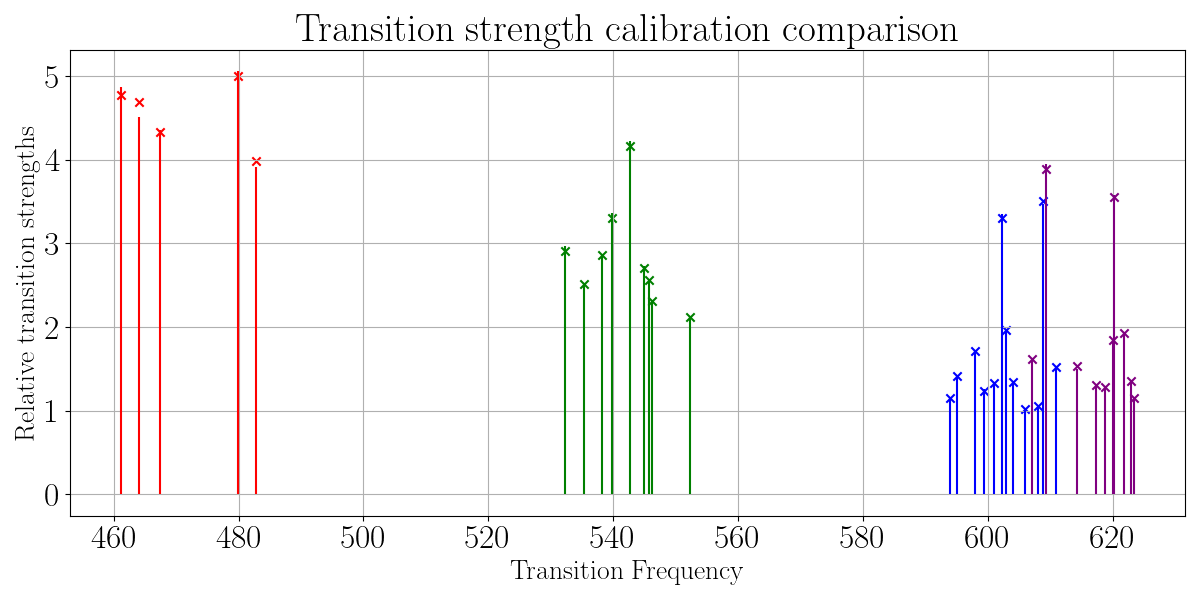

In [341]:
import numpy as np
import matplotlib.pyplot as plt

# Example placeholders — replace these with your actual arrays
x_array = freqs  # shape (24, 5), contains NaNs
print(x_array)
y1_array = pi_times_filtered  # same shape, contains NaNs
print(y1_array)
y2_array = exp_pi_times  # same shape, contains NaNs
print(y2_array)
# Row group boundaries
group_boundaries = [0, 3, 8, 15, 24]  # [0:3], [3:8], [8:15], [15:24]
colors = ['red', 'green', 'blue', 'purple']

# Start plotting
plt.figure(figsize=(12, 6))

for i in range(4):
    start, end = group_boundaries[i], group_boundaries[i+1]
    
    x_group = x_array[start:end]
    y1_group = y1_array[start:end]
    y2_group = y2_array[start:end]
    
    # Mask non-NaN entries (same positions must be valid across all arrays)
    mask = (~np.isnan(x_group)) & (~np.isnan(y1_group)) & (~np.isnan(y2_group))
    
    x_vals = x_group[mask]
    y1_vals = y1_group[mask]
    y2_vals = y2_group[mask]

    # Plot y1 as vertical lines
    plt.vlines(x_vals, ymin=0, ymax=y1_vals, color=colors[i], label=f'Y1 Group {i+1}', linewidth=1.5)

    # Plot y2 as scatter points
    plt.scatter(x_vals, y2_vals, color=colors[i], label=f'Y2 Group {i+1}', marker='x')


plt.xlabel('Transition Frequency')
plt.ylabel('Relative transition strengths')
plt.title('Transition strength calibration comparison')
# plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


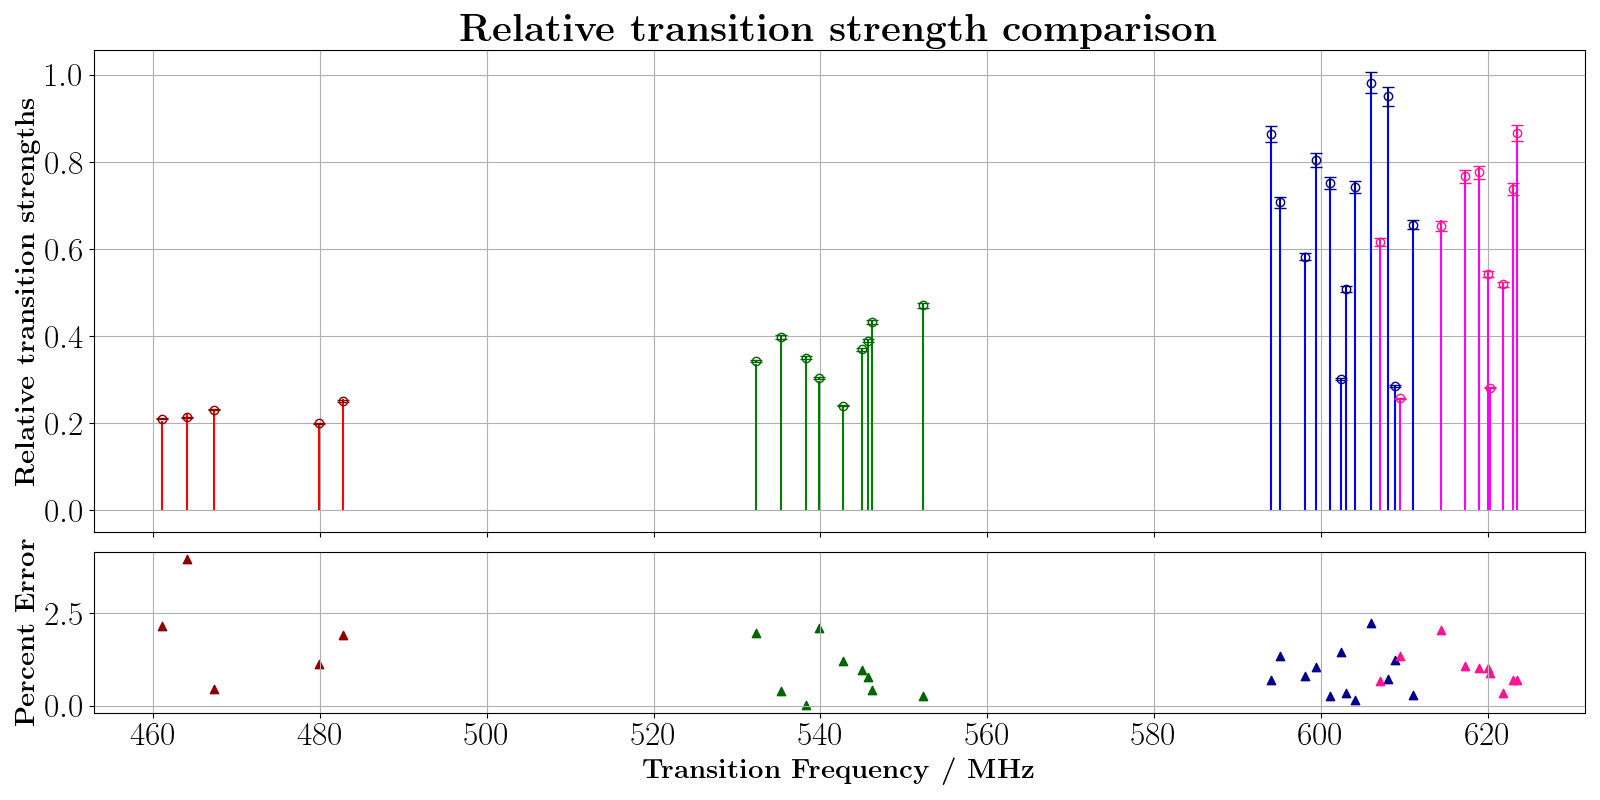

In [352]:
import numpy as np
import matplotlib.pyplot as plt

# Replace with your actual data
x_array = freqs
y1_array = 1/pi_times_filtered  # theory
y2_array = 1/exp_pi_times       # experiment
# y2_errors = np.zeros_like(y2_array)  # placeholder for errors
y2_errors = 0.025 * np.ones_like(y2_array)/exp_pi_times**2

group_boundaries = [0, 3, 8, 15, 24]
base_colors = ['red', 'green', 'blue', 'magenta']
darker_colors = ['darkred', 'darkgreen', 'darkblue', 'deeppink']

# Set up main + residual plots
fig, (ax_main, ax_residual) = plt.subplots(2, 1, figsize=(16, 8), sharex=True, height_ratios=[3, 1])

for i in range(4):
    start, end = group_boundaries[i], group_boundaries[i+1]

    x_group = x_array[start:end]
    y1_group = y1_array[start:end]
    y2_group = y2_array[start:end]
    y2_err_group = y2_errors[start:end]

    mask = (~np.isnan(x_group)) & (~np.isnan(y1_group)) & (~np.isnan(y2_group))

    x_vals = x_group[mask]
    y1_vals = y1_group[mask]
    y2_vals = y2_group[mask]
    y2_errs = y2_err_group[mask]

    # Main plot: theory (vlines) + experiment (arrow markers)
    ax_main.vlines(x_vals, ymin=0, ymax=y1_vals, color=base_colors[i], label=f'Theory Group {i+1}', linewidth=1.5)
    ax_main.errorbar(
        x_vals, y2_vals, yerr=y2_errs, fmt='o', markersize=6,
        markerfacecolor='none', markeredgecolor=darker_colors[i],
        ecolor=darker_colors[i], label=f'Experiment Group {i+1}', capsize=4
    )

    # Residuals
    residuals = 100*np.abs(y2_vals - y1_vals)/y1_vals
    ax_residual.scatter(x_vals, residuals, color=darker_colors[i], marker='^', label=f'Group {i+1} residuals')

# Labels and titles
ax_main.set_ylabel(r'\textbf{Relative transition strengths}')
ax_main.set_title(r'\textbf{Relative transition strength comparison}')
ax_main.grid(True)

# ax_residual.axhline(0, color='gray', linestyle='--')
ax_residual.set_ylabel(r'\textbf{Percent Error}')
ax_residual.set_xlabel(r'\textbf{Transition Frequency / MHz}')
ax_residual.grid(True)

# Optional: remove duplicate legend entries
handles_main, labels_main = ax_main.get_legend_handles_labels()
by_label_main = dict(zip(labels_main, handles_main))
# ax_main.legend(by_label_main.values(), by_label_main.keys(), loc='upper right')

plt.tight_layout()
plt.savefig('Relative_trans_comparison.svg')
plt.show()


Fitted π-time: 20.0000 ± 0.0565 (units)


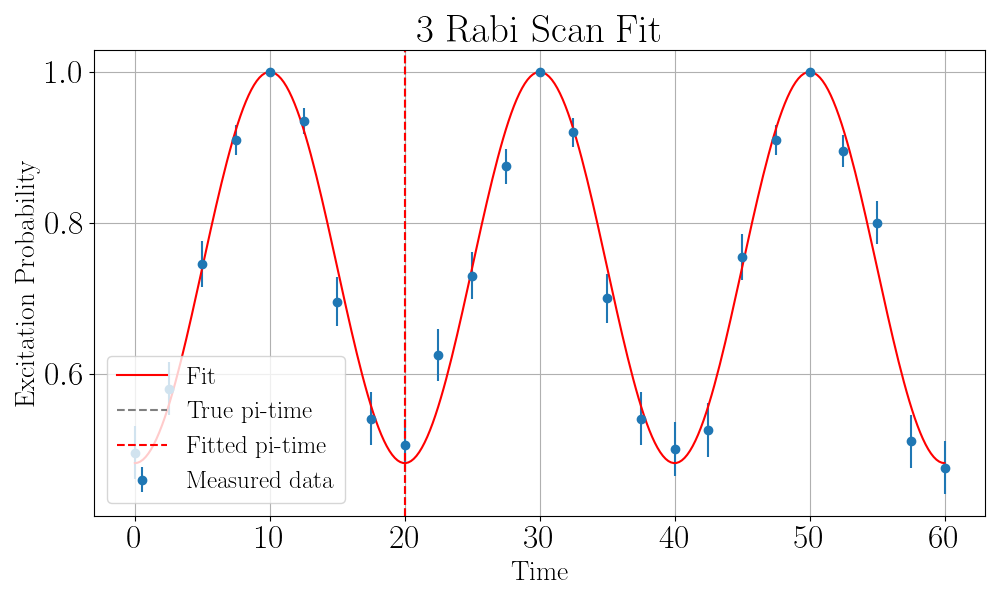

In [343]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Simulation parameters
N_shots = 200
true_pi_time = 20.0
A_true = 0.5
offset_true = 0.5
n_points = 25
t_values = np.linspace(0, 3 * true_pi_time, n_points)

# Rabi model function
def rabi_model(t, A, pi_time, offset):
    return A * np.sin(np.pi * t / (pi_time))**2 + offset

# Generate ideal probabilities
ideal_probs = rabi_model(t_values, A_true, true_pi_time, offset_true)

# Simulate binomial measurements
measured_probs = []
uncertainties = []
eps = 1e-4  # floor to avoid zero uncertainty

for p in ideal_probs:
    counts = np.random.binomial(N_shots, p)
    p_meas = counts / N_shots
    measured_probs.append(p_meas)
    p_clipped = np.clip(p_meas, eps, 1 - eps)
    sigma = np.sqrt(p_clipped * (1 - p_clipped) / N_shots)
    uncertainties.append(sigma)

measured_probs = np.array(measured_probs)
uncertainties = np.array(uncertainties)

# Fit the model
initial_guess = [0.4, 20.0, 0.4]
bounds = ([0, 1.0, 0], [1.0, 20.0, 1.0])  # A, pi_time, offset
popt, pcov = curve_fit(
    rabi_model, t_values, measured_probs,
    sigma=uncertainties, absolute_sigma=True,
    p0=initial_guess, bounds=bounds
)

# Extract results
A_fit, pi_time_fit, offset_fit = popt
pi_time_uncertainty = np.sqrt(pcov[1, 1])

print(f"Fitted π-time: {pi_time_fit:.4f} ± {pi_time_uncertainty:.4f} (units)")

# Plot results
t_fit = np.linspace(0, 3 * true_pi_time, 300)
fit_curve = rabi_model(t_fit, *popt)

plt.figure(figsize=(10, 6))
plt.errorbar(t_values, measured_probs, yerr=uncertainties, fmt='o', label='Measured data')
plt.plot(t_fit, fit_curve, 'r-', label='Fit')
plt.axvline(true_pi_time, color='gray', linestyle='--', label='True pi-time')
plt.axvline(pi_time_fit, color='red', linestyle='--', label='Fitted pi-time')
plt.xlabel("Time")
plt.ylabel("Excitation Probability")
plt.title("3 Rabi Scan Fit")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
